In [1]:
%matplotlib inline
# !pip install stargazer
# !pip install scipy
# !pip install plotly_express
# !pip install pandas-profiling
# !pip install linearmodels
# !pip install sklearn

import scipy
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from IPython.display import HTML
import linearmodels as lm
from linearmodels import PanelOLS
import warnings
warnings.filterwarnings("ignore")
import math
# import sklearn

from linearmodels.panel import compare
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api


In [2]:
path="/Users/mengxi/Documents/GitHub/research_module/data/"
data=pd.read_stata(path+"county_clean/total_and_by_industry_data_county.dta")

# path="/Users/effie/Desktop/term3/research_module/data/"
# data=pd.read_stata(path+"county_clean/total_and_by_industry_data_county.dta")

data=data.drop(columns=['index'])

data=data.rename(columns={"ln_gdp": "gdp_growth_100"})

data




,year,Gebietseinheit,EU_Code,Regional_key,Land,resident,gdp_growth_100,gdp_level,gdp_per_inhabitant,gdp_per_employee,...,toas_ratio,emp_agr_weight,emp_man_weight,emp_ser_weight,gva_agr_weight,gva_man_weight,gva_ser_weight,vow_agr_weight,vow_man_weight,vow_ser_weight
0,2005,"Stuttgart, Landeshauptstadt, Stadtkreis",DE111,08111,BW,574.627014,-2.595548,39624.353,68957.0,83804.0,...,1.0,0.002310,0.210602,0.787089,0.000741,0.321257,0.678002,0.002739,0.219986,0.777276
1,2005,"Böblingen, Landkreis",DE112,08115,BW,366.231995,-10.258647,12993.051,35478.0,61177.0,...,1.0,0.004826,0.412613,0.582561,0.001957,0.435541,0.562501,0.006725,0.435416,0.557859
2,2005,"Esslingen, Landkreis",DE113,08116,BW,504.429993,0.212459,15237.577,30208.0,61109.0,...,1.0,0.006164,0.369497,0.624339,0.002130,0.393602,0.604268,0.007894,0.389075,0.603031
3,2005,"Göppingen, Landkreis",DE114,08117,BW,254.494995,-1.309602,6077.935,23882.0,54336.0,...,1.0,0.012873,0.394026,0.593100,0.005486,0.417749,0.576766,0.019193,0.417092,0.563714
4,2005,"Ludwigsburg, Landkreis",DE115,08118,BW,505.869995,2.257281,16209.134,32042.0,68900.0,...,1.0,0.014138,0.338531,0.647332,0.004291,0.380648,0.615061,0.018165,0.357240,0.624595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,2012,Saale-Orla-Kreis,DEG0K,16075,TH,84.847000,5.540099,1955.848,23051.0,48013.0,...,NaN,0.044653,0.428515,0.526831,0.031515,0.474068,0.494417,NaN,NaN,NaN
3204,2012,"Greiz, Landkreis",DEG0L,16076,TH,103.880997,2.040082,1854.354,17851.0,46776.0,...,0.0,0.037358,0.373862,0.588780,0.031252,0.365997,0.602751,NaN,NaN,NaN
3205,2012,"Altenburger Land, Landkreis",DEG0M,16077,TH,95.289001,-1.616072,1689.681,17732.0,45168.0,...,1.0,0.028015,0.338902,0.633083,0.023566,0.340479,0.635954,NaN,NaN,NaN
3206,2012,"Eisenach, Kreisfreie Stadt",DEG0N,16056,TH,NaN,NaN,NaN,NaN,NaN,...,0.0,0.002846,0.296681,0.700473,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data["No_ratio"].describe()

count    2408.000000
mean        0.286297
std         0.338936
min         0.000000
25%         0.000000
50%         0.166667
75%         0.500000
max         1.000000
Name: No_ratio, dtype: float64

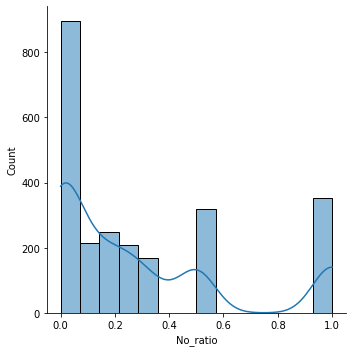

In [21]:
sns.displot(data, x="No_ratio", kde=True)

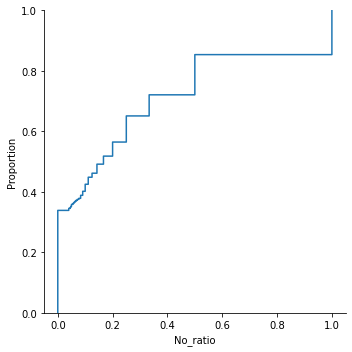

In [23]:
sns.displot(data, x="No_ratio", kind="ecdf")

In [18]:
data["toas_ratio"].describe()

count    2408.000000
mean        0.627292
std         0.475227
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.146924
Name: toas_ratio, dtype: float64

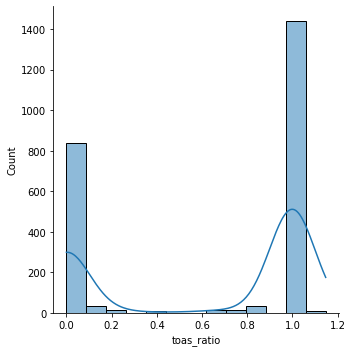

In [22]:
sns.displot(data, x="toas_ratio", kde=True)

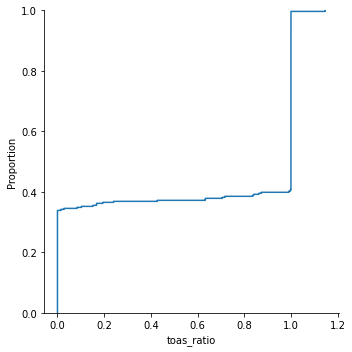

In [24]:
sns.displot(data, x="toas_ratio", kind="ecdf")

In [54]:
query_data = data.query('No_ratio>0.286')
data.loc[:,'county_affected_no'] = data.index.map(lambda x : 1 if x in query_data.index else 0)

query_data = data.query('toas_ratio>0.627')
data.loc[:,'county_affected_toas'] = data.index.map(lambda x : 1 if x in query_data.index else 0)

query_data = data.query('year>2008')
data.loc[:,'year_post'] = data.index.map(lambda x : 1 if x in query_data.index else 0)
data

,year,Gebietseinheit,EU_Code,Regional_key,Land,resident,gdp_growth_100,gdp_level,gdp_per_inhabitant,gdp_per_employee,...,emp_ser_weight,gva_agr_weight,gva_man_weight,gva_ser_weight,vow_agr_weight,vow_man_weight,vow_ser_weight,county_affected_no,county_affected_toas,year_post
0,2005,"Stuttgart, Landeshauptstadt, Stadtkreis",DE111,08111,BW,574.63,-2.60,"39,624.35","68,957.00","83,804.00",...,0.79,0.00,0.32,0.68,0.00,0.22,0.78,1,1,0
1,2005,"Böblingen, Landkreis",DE112,08115,BW,366.23,-10.26,"12,993.05","35,478.00","61,177.00",...,0.58,0.00,0.44,0.56,0.01,0.44,0.56,0,1,0
2,2005,"Esslingen, Landkreis",DE113,08116,BW,504.43,0.21,"15,237.58","30,208.00","61,109.00",...,0.62,0.00,0.39,0.60,0.01,0.39,0.60,0,1,0
3,2005,"Göppingen, Landkreis",DE114,08117,BW,254.49,-1.31,"6,077.94","23,882.00","54,336.00",...,0.59,0.01,0.42,0.58,0.02,0.42,0.56,1,1,0
4,2005,"Ludwigsburg, Landkreis",DE115,08118,BW,505.87,2.26,"16,209.13","32,042.00","68,900.00",...,0.65,0.00,0.38,0.62,0.02,0.36,0.62,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,2012,Saale-Orla-Kreis,DEG0K,16075,TH,84.85,5.54,"1,955.85","23,051.00","48,013.00",...,0.53,0.03,0.47,0.49,NaN,NaN,NaN,0,0,1
3204,2012,"Greiz, Landkreis",DEG0L,16076,TH,103.88,2.04,"1,854.35","17,851.00","46,776.00",...,0.59,0.03,0.37,0.60,NaN,NaN,NaN,0,0,1
3205,2012,"Altenburger Land, Landkreis",DEG0M,16077,TH,95.29,-1.62,"1,689.68","17,732.00","45,168.00",...,0.63,0.02,0.34,0.64,NaN,NaN,NaN,1,1,1
3206,2012,"Eisenach, Kreisfreie Stadt",DEG0N,16056,TH,NaN,NaN,NaN,NaN,NaN,...,0.70,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [55]:
data.columns

Index(['year', 'Gebietseinheit', 'EU_Code', 'Regional_key', 'Land', 'resident',
       'gdp_growth_100', 'gdp_level', 'gdp_per_inhabitant', 'gdp_per_employee',
       'gdp_per_hour_per_employed', 'ln_gva', 'gva_level', 'gva_agr',
       'gva_man', 'gva_ser', 'gva_ser_fin', 'gva_ser_trade', 'gva_ser_public',
       'employee', 'emp_agr', 'emp_man', 'emp_ser', 'emp_ser_fin',
       'emp_ser_trade', 'emp_ser_public', 'volume_of_work', 'vow_agr',
       'vow_man', 'vow_ser', 'vow_ser_fin', 'vow_ser_trade', 'vow_ser_public',
       'fixed_agr', 'fixed_man', 'fixed_ser', 'fixed_ser_trade',
       'fixed_ser_fin', 'fixed_ser_public', 'fixed_total', 'firms_no',
       'firms_aff_no', 'No_ratio', 'toas_sum_county', 'toas_aff_sum_county',
       'toas_ratio', 'emp_agr_weight', 'emp_man_weight', 'emp_ser_weight',
       'gva_agr_weight', 'gva_man_weight', 'gva_ser_weight', 'vow_agr_weight',
       'vow_man_weight', 'vow_ser_weight', 'county_affected_no',
       'county_affected_toas', 'year_post'

In [56]:


data["Land"].value_counts()

BY    768
NW    424
NI    360
BW    352
RP    288
HE    208
TH    184
BB    144
SH    120
ST    112
SN    104
MV     64
SL     48
HB     16
BE      8
HH      8
Name: Land, dtype: int64

In [57]:
data["affected_after_no"] = data.county_affected_no*data.year_post
data["affected_after_toas"] = data.county_affected_toas*data.year_post
data["ln_res"]=np.log(data["resident"]*1000)

data["ln_gdp_level"] = np.log(data.gdp_level*1000000)
data["ln_gdp_per_inhabitant"] = np.log(data.gdp_per_inhabitant)
data["ln_gdp_per_employee"] = np.log(data.gdp_per_employee)
data["ln_gdp_per_hour_per_employed"] = np.log(data.gdp_per_hour_per_employed)

data["ln_gva_level"] = np.log(data.gva_level*1000000)
data["ln_gva_agr"] = np.log(data.gva_agr*1000000)
data["ln_gva_man"] = np.log(data.gva_man*1000000)
data["ln_gva_ser"] = np.log(data.gva_ser*1000000)
data["ln_gva_ser_fin"] = np.log(data.gva_ser_fin*1000000)
data["ln_gva_ser_trade"] = np.log(data.gva_ser_trade*1000000)
data["ln_gva_ser_public"] = np.log(data.gva_ser_public*1000000)

data["ln_emp"]=np.log(data["employee"]*1000)

data["ln_emp_ser_fin"] = np.log(data.emp_ser_fin*1000)
data["ln_emp_ser_trade"] = np.log(data.emp_ser_trade*1000)
data["ln_emp_ser_public"] = np.log(data.emp_ser_public*1000)
data["ln_emp_agr"]=np.log(data["emp_agr"]*1000)
data["ln_emp_man"]=np.log(data["emp_man"]*1000)
data["ln_emp_ser"]=np.log(data["emp_ser"]*1000)

data["ln_vow"]=np.log(data["volume_of_work"]*1000000)

data["ln_vow_ser_fin"] = np.log(data.vow_ser_fin*1000000)
data["ln_vow_ser_trade"] = np.log(data.vow_ser_trade*1000000)
data["ln_vow_ser_public"] = np.log(data.vow_ser_public*1000000)
data["ln_vow_agr"]=np.log(data["vow_agr"]*1000000)
data["ln_vow_man"]=np.log(data["vow_man"]*1000000)
data["ln_vow_ser"]=np.log(data["vow_ser"]*1000000)

data["ln_fixed_total"] = np.log(data.fixed_total*1000000)
data["ln_fixed_ser_fin"] = np.log(data.fixed_ser_fin*1000000)
data["ln_fixed_ser_fin"] = np.log(data.fixed_ser_fin*1000000)
data["ln_fixed_ser_trade"] = np.log(data.fixed_ser_trade*1000000)
data["ln_fixed_ser_public"] = np.log(data.fixed_ser_public*1000000)
data["ln_fixed_agr"]=np.log(data["fixed_agr"]*1000000)
data["ln_fixed_man"]=np.log(data["fixed_man"]*1000000)
data["ln_fixed_ser"]=np.log(data["fixed_ser"]*1000000)

data["gdp_growth"]=data["gdp_growth_100"]/100

df_fe = data.set_index(['Regional_key','year'])
df_fe

,,Gebietseinheit,EU_Code,Land,resident,gdp_growth_100,gdp_level,gdp_per_inhabitant,gdp_per_employee,gdp_per_hour_per_employed,ln_gva,...,ln_vow_man,ln_vow_ser,ln_fixed_total,ln_fixed_ser_fin,ln_fixed_ser_trade,ln_fixed_ser_public,ln_fixed_agr,ln_fixed_man,ln_fixed_ser,gdp_growth
Regional_key,year,,,,,,,,,,,,,,,,,,,,,
08111,2005,"Stuttgart, Landeshauptstadt, Stadtkreis",DE111,BW,574.63,-2.60,"39,624.35","68,957.00","83,804.00",57.24,-2.75,...,18.84,20.10,24.92,24.06,22.83,22.97,20.44,23.73,24.55,-0.03
08115,2005,"Böblingen, Landkreis",DE112,BW,366.23,-10.26,"12,993.05","35,478.00","61,177.00",42.86,-10.40,...,18.70,18.95,24.92,24.06,22.83,22.97,20.44,23.73,24.55,-0.10
08116,2005,"Esslingen, Landkreis",DE113,BW,504.43,0.21,"15,237.58","30,208.00","61,109.00",42.93,0.05,...,18.74,19.18,24.92,24.06,22.83,22.97,20.44,23.73,24.55,0.00
08117,2005,"Göppingen, Landkreis",DE114,BW,254.49,-1.31,"6,077.94","23,882.00","54,336.00",38.51,-1.47,...,18.00,18.30,24.92,24.06,22.83,22.97,20.44,23.73,24.55,-0.01
08118,2005,"Ludwigsburg, Landkreis",DE115,BW,505.87,2.26,"16,209.13","32,042.00","68,900.00",48.60,2.09,...,18.60,19.15,24.92,24.06,22.83,22.97,20.44,23.73,24.55,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2012,Saale-Orla-Kreis,DEG0K,TH,84.85,5.54,"1,955.85","23,051.00","48,013.00",NaN,5.59,...,NaN,NaN,23.17,22.08,21.33,21.62,19.45,21.87,22.82,0.06
16076,2012,"Greiz, Landkreis",DEG0L,TH,103.88,2.04,"1,854.35","17,851.00","46,776.00",NaN,2.09,...,NaN,NaN,23.17,22.08,21.33,21.62,19.45,21.87,22.82,0.02
16077,2012,"Altenburger Land, Landkreis",DEG0M,TH,95.29,-1.62,"1,689.68","17,732.00","45,168.00",NaN,-1.57,...,NaN,NaN,23.17,22.08,21.33,21.62,19.45,21.87,22.82,-0.02


In [58]:
data.columns

Index(['year', 'Gebietseinheit', 'EU_Code', 'Regional_key', 'Land', 'resident',
       'gdp_growth_100', 'gdp_level', 'gdp_per_inhabitant', 'gdp_per_employee',
       'gdp_per_hour_per_employed', 'ln_gva', 'gva_level', 'gva_agr',
       'gva_man', 'gva_ser', 'gva_ser_fin', 'gva_ser_trade', 'gva_ser_public',
       'employee', 'emp_agr', 'emp_man', 'emp_ser', 'emp_ser_fin',
       'emp_ser_trade', 'emp_ser_public', 'volume_of_work', 'vow_agr',
       'vow_man', 'vow_ser', 'vow_ser_fin', 'vow_ser_trade', 'vow_ser_public',
       'fixed_agr', 'fixed_man', 'fixed_ser', 'fixed_ser_trade',
       'fixed_ser_fin', 'fixed_ser_public', 'fixed_total', 'firms_no',
       'firms_aff_no', 'No_ratio', 'toas_sum_county', 'toas_aff_sum_county',
       'toas_ratio', 'emp_agr_weight', 'emp_man_weight', 'emp_ser_weight',
       'gva_agr_weight', 'gva_man_weight', 'gva_ser_weight', 'vow_agr_weight',
       'vow_man_weight', 'vow_ser_weight', 'county_affected_no',
       'county_affected_toas', 'year_post'

In [68]:
data_check1 = df_fe[['gdp_level','gdp_per_inhabitant','gdp_per_employee','gdp_per_hour_per_employed','gdp_growth','gva_level','gva_agr','gva_man','gva_ser','gva_ser_fin','gva_ser_trade','gva_ser_public']]

data_check1

,,gdp_level,gdp_per_inhabitant,gdp_per_employee,gdp_per_hour_per_employed,gdp_growth,gva_level,gva_agr,gva_man,gva_ser,gva_ser_fin,gva_ser_trade,gva_ser_public
Regional_key,year,,,,,,,,,,,,
08111,2005,"39,624.35","68,957.00","83,804.00",57.24,-0.03,"35,838.18",26.56,"11,513.27","24,298.35","12,139.77","6,102.42","6,056.16"
08115,2005,"12,993.05","35,478.00","61,177.00",42.86,-0.10,"11,751.54",23.00,"5,118.28","6,610.26","2,637.97","2,497.19","1,475.10"
08116,2005,"15,237.58","30,208.00","61,109.00",42.93,0.00,"13,781.60",29.35,"5,424.47","8,327.78","3,136.87","3,195.15","1,995.76"
08117,2005,"6,077.94","23,882.00","54,336.00",38.51,-0.01,"5,497.18",30.16,"2,296.44","3,170.58","1,302.63",819.25,"1,048.70"
08118,2005,"16,209.13","32,042.00","68,900.00",48.60,0.02,"14,660.32",62.91,"5,580.42","9,016.99","4,660.21","2,398.77","1,958.01"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2012,"1,955.85","23,051.00","48,013.00",NaN,0.06,"1,756.71",55.36,832.80,868.55,316.06,184.51,367.98
16076,2012,"1,854.35","17,851.00","46,776.00",NaN,0.02,"1,665.56",52.05,609.59,"1,003.91",324.38,291.86,387.68
16077,2012,"1,689.68","17,732.00","45,168.00",NaN,-0.02,"1,517.65",35.76,516.73,965.15,313.50,246.14,405.52


In [77]:
data_check2 = df_fe[['resident','employee','emp_agr','emp_man','emp_ser','emp_ser_fin','emp_ser_trade','emp_ser_public','volume_of_work','vow_agr','vow_man','vow_ser','vow_ser_fin','vow_ser_trade','vow_ser_public']]


In [78]:
data_check3 = df_fe[['fixed_total','fixed_agr','fixed_man','fixed_ser','fixed_ser_fin','fixed_ser_trade','fixed_ser_public','firms_no','firms_aff_no','No_ratio','toas_sum_county','toas_aff_sum_county','toas_ratio']]


In [79]:
data_check4 = df_fe[['emp_agr_weight','emp_man_weight','emp_ser_weight','gva_agr_weight','gva_man_weight','gva_ser_weight','vow_agr_weight','vow_man_weight','vow_ser_weight','county_affected_no','county_affected_toas','affected_after_no','affected_after_toas']]



In [80]:
pd.options.display.float_format = '{:,.2f}'.format
data_check1.describe()

,gdp_level,gdp_per_inhabitant,gdp_per_employee,gdp_per_hour_per_employed,gdp_growth,gva_level,gva_agr,gva_man,gva_ser,gva_ser_fin,gva_ser_trade,gva_ser_public
count,"3,192.00","3,192.00","3,192.00","3,024.00","3,192.00","3,192.00","3,176.00","3,192.00","3,192.00","3,192.00","3,192.00","3,192.00"
mean,"6,308.69","29,091.86","57,105.47",40.62,0.03,"5,676.20",50.41,"1,682.25","3,943.79","1,543.41","1,176.32","1,224.06"
std,"9,634.63","13,029.63","11,059.32",7.74,0.05,"8,667.35",48.18,"1,918.96","7,030.55","3,060.60","2,268.93","1,905.97"
min,882.29,"11,428.00","36,143.00",25.03,-0.30,797.99,0.08,133.03,490.57,152.90,98.56,194.13
25%,"2,428.95","21,051.00","50,201.50",35.99,0.00,"2,183.58",13.70,631.88,"1,441.62",533.67,363.28,499.94
50%,"3,876.80","25,522.50","55,221.50",39.72,0.03,"3,491.97",39.48,"1,083.40","2,230.69",824.62,622.67,782.19
75%,"6,680.96","32,209.75","61,260.75",43.69,0.05,"6,020.82",70.14,"1,981.28","3,966.72","1,416.62","1,140.25","1,302.57"
max,"109,771.99","128,296.00","132,099.00",89.87,0.45,"98,595.70",423.87,"18,997.46","82,304.97","32,603.91","29,738.69","30,136.26"


In [81]:
data_check2.describe()

,resident,employee,emp_agr,emp_man,emp_ser,emp_ser_fin,emp_ser_trade,emp_ser_public,volume_of_work,vow_agr,vow_man,vow_ser,vow_ser_fin,vow_ser_trade,vow_ser_public
count,"3,192.00","3,208.00","3,208.00","3,208.00","3,208.00","3,208.00","3,208.00","3,208.00","3,024.00","3,024.00","3,024.00","3,024.00","3,024.00","3,024.00","3,024.00"
mean,201.86,101.47,1.64,25.36,74.47,16.67,26.45,31.35,149.91,3.22,39.69,107.00,24.61,39.14,43.25
std,223.12,129.36,1.38,21.44,111.15,32.20,36.41,44.34,193.72,2.73,33.39,165.27,48.57,55.13,64.51
min,34.11,19.16,0.01,3.44,12.83,1.70,4.64,5.71,26.68,0.05,5.57,17.11,2.57,5.83,7.29
25%,106.08,46.28,0.52,12.67,31.12,5.43,11.27,13.81,70.21,0.94,19.78,44.71,7.99,16.88,18.60
50%,148.79,68.61,1.40,19.00,47.12,8.80,17.05,21.06,102.08,2.79,30.21,68.05,13.12,25.25,28.92
75%,239.22,113.34,2.33,30.68,84.34,16.83,29.88,34.72,165.81,4.71,48.57,118.39,24.26,42.69,47.66
max,"3,350.61","1,744.89",8.59,221.13,"1,523.24",395.10,443.73,684.41,"2,544.16",17.00,343.85,"2,199.47",579.18,635.83,988.53


In [82]:
data_check3.describe()

,fixed_total,fixed_agr,fixed_man,fixed_ser,fixed_ser_fin,fixed_ser_trade,fixed_ser_public,firms_no,firms_aff_no,No_ratio,toas_sum_county,toas_aff_sum_county,toas_ratio
count,"3,208.00","3,208.00","3,208.00","3,208.00","3,208.00","3,208.00","3,208.00","2,408.00","1,592.00","2,408.00","2,408.00","2,408.00","2,408.00"
mean,"59,207.13","1,078.69","14,172.42","43,955.95","27,071.85","7,661.91","9,222.66",4.20,1.00,0.29,251.50,187.45,0.63
std,"37,207.23",720.85,"9,158.30","27,824.52","18,016.27","4,994.10","5,178.38",4.27,0.00,0.34,598.79,535.65,0.48
min,"3,674.38",2.98,885.18,"2,716.93","1,105.47",461.41,607.02,1.00,1.00,0.00,0.26,0.00,0.00
25%,"20,617.44",453.06,"5,457.59","15,254.79","8,982.00","2,407.06","3,675.38",1.00,1.00,0.00,36.01,0.00,0.00
50%,"59,858.60",858.56,"12,032.26","45,744.49","28,015.28","7,590.47","9,329.03",3.00,1.00,0.17,92.20,32.94,1.00
75%,"95,084.69","1,789.77","22,616.91","70,353.14","41,643.28","12,619.07","14,060.15",5.00,1.00,0.50,222.08,162.23,1.00
max,"117,747.20","2,399.58","28,863.28","88,991.90","57,683.87","20,399.80","17,655.75",25.00,1.00,1.00,"6,588.97","6,588.97",1.15


In [83]:
data_check4.describe()

,emp_agr_weight,emp_man_weight,emp_ser_weight,gva_agr_weight,gva_man_weight,gva_ser_weight,vow_agr_weight,vow_man_weight,vow_ser_weight,county_affected_no,county_affected_toas,affected_after_no,affected_after_toas
count,"3,208.00","3,208.00","3,208.00","3,176.00","3,176.00","3,176.00","3,024.00","3,024.00","3,024.00","3,208.00","3,208.00","3,208.00","3,208.00"
mean,0.02,0.28,0.70,0.02,0.32,0.66,0.03,0.29,0.67,0.26,0.47,0.13,0.24
std,0.02,0.09,0.10,0.01,0.11,0.11,0.03,0.09,0.10,0.44,0.50,0.34,0.42
min,0.00,0.06,0.36,0.00,0.05,0.25,0.00,0.07,0.32,0.00,0.00,0.00,0.00
25%,0.01,0.21,0.63,0.00,0.24,0.60,0.01,0.23,0.60,0.00,0.00,0.00,0.00
50%,0.02,0.27,0.70,0.01,0.32,0.66,0.02,0.29,0.67,0.00,0.00,0.00,0.00
75%,0.04,0.35,0.77,0.02,0.39,0.74,0.05,0.36,0.74,1.00,1.00,0.00,0.00
max,0.11,0.58,0.93,0.09,0.75,0.95,0.16,0.61,0.93,1.00,1.00,1.00,1.00


<a class="anchor" id="8. Difference in differences implementation"></a>

---
# gdp


##  gdp - no



In [18]:
exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_level,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_level,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","gva_man_weight","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_inhabitant,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","gva_man_weight","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_inhabitant,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_employee,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_employee,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_hour_per_employed,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_hour_per_employed,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))


print(compare({"(7)": res_fe_7, "(8)": res_fe_8}, stars = True, precision = "std_errors"))



                                               Model Comparison                                              
                                     (1)              (2)                       (3)                       (4)
-------------------------------------------------------------------------------------------------------------
Dep. Variable               ln_gdp_level     ln_gdp_level     ln_gdp_per_inhabitant     ln_gdp_per_inhabitant
Estimator                       PanelOLS         PanelOLS                  PanelOLS                  PanelOLS
No. Observations                    3176             3176                      3176                      3176
Cov. Est.                      Clustered        Clustered                 Clustered                 Clustered
R-squared                         0.8604           0.4427                    0.3776                    0.4312
R-Squared (Within)               -0.0413           0.2951                    0.1303                    0.3023
R-Squared 

In [19]:
# gdp growth

exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.gdp_growth,exog,entity_effects=False)
res_fe_9 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.gdp_growth,exog,entity_effects=True,time_effects=True)
res_fe_10 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(9)": res_fe_9, "(10)": res_fe_10}, stars = True, precision = "std_errors"))

                   Model Comparison                  
                                   (9)           (10)
-----------------------------------------------------
Dep. Variable               gdp_growth     gdp_growth
Estimator                     PanelOLS       PanelOLS
No. Observations                  3176           3176
Cov. Est.                    Clustered      Clustered
R-squared                       0.0408         0.1332
R-Squared (Within)              0.0395         0.1944
R-Squared (Between)             0.0631        -56.487
R-Squared (Overall)             0.0408        -3.0396
F-statistic                     19.263         85.065
P-value (F-stat)                0.0000         0.0000
=====================     ============   ============
const                        -0.0669**       -1.1996*
                              (0.0266)       (0.6327)
affected_after_no               0.0049         0.0001
                              (0.0038)       (0.0029)
year_post                   

##  gdp - toas

In [20]:
exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_level,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_level,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","gva_man_weight","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_inhabitant,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","gva_man_weight","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_inhabitant,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_employee,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_employee,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_hour_per_employed,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gdp_per_hour_per_employed,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))

print(compare({"(7)": res_fe_7, "(8)": res_fe_8}, stars = True, precision = "std_errors"))




                                               Model Comparison                                               
                                      (1)              (2)                       (3)                       (4)
--------------------------------------------------------------------------------------------------------------
Dep. Variable                ln_gdp_level     ln_gdp_level     ln_gdp_per_inhabitant     ln_gdp_per_inhabitant
Estimator                        PanelOLS         PanelOLS                  PanelOLS                  PanelOLS
No. Observations                     3176             3176                      3176                      3176
Cov. Est.                       Clustered        Clustered                 Clustered                 Clustered
R-squared                          0.8606           0.4423                    0.3791                    0.4324
R-Squared (Within)                -0.0367           0.2868                    0.1323                    0.2780
R

In [21]:
# gdp growth

exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.gdp_growth,exog,entity_effects=False)
res_fe_9 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.gdp_growth,exog,entity_effects=True,time_effects=True)
res_fe_10 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(9)": res_fe_9, "(10)": res_fe_10}, stars = True, precision = "std_errors"))

                   Model Comparison                   
                                    (9)           (10)
------------------------------------------------------
Dep. Variable                gdp_growth     gdp_growth
Estimator                      PanelOLS       PanelOLS
No. Observations                   3176           3176
Cov. Est.                     Clustered      Clustered
R-squared                        0.0403         0.1335
R-Squared (Within)               0.0391         0.1953
R-Squared (Between)              0.0609        -60.310
R-Squared (Overall)              0.0403        -3.2568
F-statistic                      19.026         85.273
P-value (F-stat)                 0.0000         0.0000
======================     ============   ============
const                         -0.0720**      -1.2873**
                               (0.0296)       (0.6331)
affected_after_toas             -0.0012        -0.0025
                               (0.0033)       (0.0025)
year_post 

<a class="anchor" id="8. Difference in differences implementation"></a>

---
# gva

##  gva - no



In [22]:

exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_level,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_level,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_agr_weight","ln_res","ln_fixed_agr"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_agr,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_agr_weight","ln_res","ln_fixed_agr"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_agr,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_man_weight","ln_res","ln_fixed_man"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_man,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_man_weight","ln_res","ln_fixed_man"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_man,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_ser_weight","ln_res","ln_fixed_ser"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_ser_weight","ln_res","ln_fixed_ser"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2,"(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))


print(compare({"(7)": res_fe_7, "(8)": res_fe_8}, stars = True, precision = "std_errors"))




                                    Model Comparison                                   
                                     (1)              (2)            (3)            (4)
---------------------------------------------------------------------------------------
Dep. Variable               ln_gva_level     ln_gva_level     ln_gva_agr     ln_gva_agr
Estimator                       PanelOLS         PanelOLS       PanelOLS       PanelOLS
No. Observations                    3176             3176           3176           3176
Cov. Est.                      Clustered        Clustered      Clustered      Clustered
R-squared                         0.8605           0.4427         0.6487         0.2513
R-Squared (Within)               -0.0761           0.3101         0.3157         0.4339
R-Squared (Between)               0.8677           0.5414         0.6560         0.0700
R-Squared (Overall)               0.8605           0.5396         0.6487         0.0779
F-statistic                     

In [23]:
exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_ser_weight","ln_res","ln_fixed_ser_fin"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_fin,exog,entity_effects=False)
res_fe_9 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_ser_weight","ln_res","ln_fixed_ser_fin"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_fin,exog,entity_effects=True,time_effects=True)
res_fe_10 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_ser_weight","ln_res","ln_fixed_ser_trade"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_trade,exog,entity_effects=False)
res_fe_11 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_ser_weight","ln_res","ln_fixed_ser_trade"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_trade,exog,entity_effects=True,time_effects=True)
res_fe_12 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no","gva_ser_weight","ln_res","ln_fixed_ser_public"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_public,exog,entity_effects=False)
res_fe_13 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no',"gva_ser_weight","ln_res","ln_fixed_ser_public"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_public,exog,entity_effects=True,time_effects=True)
res_fe_14 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(9)": res_fe_9, "(10)": res_fe_10, "(11)": res_fe_11, "(12)": res_fe_12}, stars = True, precision = "std_errors"))

print(compare({"(13)": res_fe_13, "(14)": res_fe_14}, stars = True, precision = "std_errors"))


# gva - no -significant gva level agr  man fin  trade 

                                            Model Comparison                                           
                                       (9)               (10)                 (11)                 (12)
-------------------------------------------------------------------------------------------------------
Dep. Variable               ln_gva_ser_fin     ln_gva_ser_fin     ln_gva_ser_trade     ln_gva_ser_trade
Estimator                         PanelOLS           PanelOLS             PanelOLS             PanelOLS
No. Observations                      3176               3176                 3176                 3176
Cov. Est.                        Clustered          Clustered            Clustered            Clustered
R-squared                           0.8318             0.0333               0.7807               0.1301
R-Squared (Within)                  0.1445            -0.0137              -0.2059              -0.1393
R-Squared (Between)                 0.8372             0.4210   

##  gva - toas

In [24]:

exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_level,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","gva_man_weight","ln_res","ln_fixed_total"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_level,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_agr_weight","ln_res","ln_fixed_agr"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_agr,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_agr_weight","ln_res","ln_fixed_agr"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_agr,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_man_weight","ln_res","ln_fixed_man"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_man,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_man_weight","ln_res","ln_fixed_man"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_man,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)


exog_vars = ['affected_after_toas','year_post',"county_affected_toas","gva_ser_weight","ln_res","ln_fixed_ser"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"gva_ser_weight","ln_res","ln_fixed_ser"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2,"(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))


print(compare({"(7)": res_fe_7, "(8)": res_fe_8}, stars = True, precision = "std_errors"))





                                    Model Comparison                                    
                                      (1)              (2)            (3)            (4)
----------------------------------------------------------------------------------------
Dep. Variable                ln_gva_level     ln_gva_level     ln_gva_agr     ln_gva_agr
Estimator                        PanelOLS         PanelOLS       PanelOLS       PanelOLS
No. Observations                     3176             3176           3176           3176
Cov. Est.                       Clustered        Clustered      Clustered      Clustered
R-squared                          0.8607           0.4423         0.6471         0.2506
R-Squared (Within)                -0.0713           0.3018         0.3218         0.4381
R-Squared (Between)                0.8678           0.5452         0.6543         0.0634
R-Squared (Overall)                0.8607           0.5434         0.6471         0.0715
F-statistic          

In [25]:
exog_vars = ['affected_after_toas','year_post',"county_affected_toas","emp_ser_weight","ln_res","ln_fixed_ser_fin"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_fin,exog,entity_effects=False)
res_fe_9 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"emp_ser_weight","ln_res","ln_fixed_ser_fin"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_fin,exog,entity_effects=True,time_effects=True)
res_fe_10 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas","emp_ser_weight","ln_res","ln_fixed_ser_trade"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_trade,exog,entity_effects=False)
res_fe_11 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"emp_ser_weight","ln_res","ln_fixed_ser_trade"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_trade,exog,entity_effects=True,time_effects=True)
res_fe_12 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas","emp_ser_weight","ln_res","ln_fixed_ser_public"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_public,exog,entity_effects=False)
res_fe_13 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas',"emp_ser_weight","ln_res","ln_fixed_ser_public"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_gva_ser_public,exog,entity_effects=True,time_effects=True)
res_fe_14 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(9)": res_fe_9, "(10)": res_fe_10, "(11)": res_fe_11, "(12)": res_fe_12}, stars = True, precision = "std_errors"))

print(compare({"(13)": res_fe_13, "(14)": res_fe_14}, stars = True, precision = "std_errors"))


#  gva - toas  -significant  man ser  fin  trade  pubilc 

                                            Model Comparison                                            
                                        (9)               (10)                 (11)                 (12)
--------------------------------------------------------------------------------------------------------
Dep. Variable                ln_gva_ser_fin     ln_gva_ser_fin     ln_gva_ser_trade     ln_gva_ser_trade
Estimator                          PanelOLS           PanelOLS             PanelOLS             PanelOLS
No. Observations                       3192               3192                 3192                 3192
Cov. Est.                         Clustered          Clustered            Clustered            Clustered
R-squared                            0.8558             0.0298               0.8201               0.1424
R-Squared (Within)                   0.3259             0.0523               0.1044              -0.0008
R-Squared (Between)                  0.8600            

<a class="anchor" id="8. Difference in differences implementation"></a>

---
# employee

## employee no

In [26]:
df_fe[['employee', 'emp_agr', 'emp_man','emp_ser', 'emp_ser_fin', 'emp_ser_trade', 'emp_ser_public',
       'ln_emp', 'ln_emp_ser_fin','ln_emp_agr', 'ln_emp_man', 'ln_emp_ser',
       'ln_emp_ser_trade', 'ln_emp_ser_public']]

,,employee,emp_agr,emp_man,emp_ser,emp_ser_fin,emp_ser_trade,emp_ser_public,ln_emp,ln_emp_ser_fin,ln_emp_agr,ln_emp_man,ln_emp_ser,ln_emp_ser_trade,ln_emp_ser_public
Regional_key,year,,,,,,,,,,,,,,
08111,2005,472.821014,1.092,99.577,372.152,127.607,106.265,138.280,13.066472,11.756711,6.995766,11.508686,12.827058,11.573691,11.837036
08115,2005,212.382996,1.025,87.632,123.726,32.644,53.108,37.974,12.266147,10.393416,6.932448,11.380902,11.725825,10.880083,10.544657
08116,2005,249.350006,1.537,92.134,155.679,36.087,67.210,52.382,12.426613,10.493688,7.337588,11.430999,11.955551,11.115577,10.866318
08117,2005,111.858002,1.440,44.075,66.343,12.919,25.556,27.868,11.624986,9.466454,7.272398,10.693648,11.102594,10.148627,10.235234
08118,2005,235.255005,3.326,79.641,152.288,40.715,58.201,53.372,12.368425,10.614352,8.109526,11.285284,11.933529,10.971658,10.885042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2012,40.736000,1.819,17.456,21.461,4.408,6.981,10.072,10.614867,8.391176,7.506042,9.767439,9.973993,8.850947,9.217515
16076,2012,39.643002,1.481,14.821,23.341,3.864,9.603,9.874,10.587669,8.259458,7.300473,9.603800,10.057967,9.169831,9.197660
16077,2012,37.409000,1.048,12.678,23.683,3.859,9.211,10.613,10.529667,8.258163,6.954639,9.447623,10.072513,9.128154,9.269835


In [27]:

exog_vars = ['affected_after_no','year_post',"county_affected_no","emp_agr_weight","emp_man_weight",'ln_res']
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_no','ln_res',"emp_agr_weight","emp_man_weight", ]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"emp_agr_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_agr,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"emp_agr_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_agr,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))




                                  Model Comparison                                 
                                   (1)            (2)            (3)            (4)
-----------------------------------------------------------------------------------
Dep. Variable                   ln_emp         ln_emp     ln_emp_agr     ln_emp_agr
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                  3192           3192           3192           3192
Cov. Est.                    Clustered      Clustered      Clustered      Clustered
R-squared                       0.9016         0.2856         0.7561         0.2321
R-Squared (Within)              0.3229        -0.1054        -0.2582         0.3005
R-Squared (Between)             0.9025         0.8011         0.7604         0.4016
R-Squared (Overall)             0.9016         0.7996         0.7561         0.4012
F-statistic                     4861.7         278.01         1975.6        

In [28]:
exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"emp_man_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_man,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"emp_man_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_man,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_5, "(2)": res_fe_6, "(3)": res_fe_7, "(4)": res_fe_8}, stars = True, precision = "std_errors"))

                                  Model Comparison                                 
                                   (1)            (2)            (3)            (4)
-----------------------------------------------------------------------------------
Dep. Variable               ln_emp_man     ln_emp_man     ln_emp_ser     ln_emp_ser
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                  3192           3192           3192           3192
Cov. Est.                    Clustered      Clustered      Clustered      Clustered
R-squared                       0.8833         0.6442         0.8944         0.4761
R-Squared (Within)              0.4680         0.3323         0.4590         0.1676
R-Squared (Between)             0.8844         0.6891         0.8952         0.8031
R-Squared (Overall)             0.8833         0.6881         0.8944         0.8018
F-statistic                     4822.8         1679.9         5395.6        

In [29]:
exog_vars = ['affected_after_no','year_post',"county_affected_no","emp_ser_weight",'ln_res']
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_fin,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_no','ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_fin,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_trade,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_trade,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"emp_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_public,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"emp_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_public,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))

# empl no significant: man and ser (fin trade public)


                                            Model Comparison                                           
                                       (1)                (2)                  (3)                  (4)
-------------------------------------------------------------------------------------------------------
Dep. Variable               ln_emp_ser_fin     ln_emp_ser_fin     ln_emp_ser_trade     ln_emp_ser_trade
Estimator                         PanelOLS           PanelOLS             PanelOLS             PanelOLS
No. Observations                      3192               3192                 3192                 3192
Cov. Est.                        Clustered          Clustered            Clustered            Clustered
R-squared                           0.8175             0.1231               0.8815               0.1394
R-Squared (Within)                  0.3152             0.1062               0.0480               0.0453
R-Squared (Between)                 0.8211             0.4898   

## employee toas

In [30]:
df_fe.columns

Index(['Gebietseinheit', 'EU_Code', 'Land', 'resident', 'gdp_growth_100',
       'gdp_level', 'gdp_per_inhabitant', 'gdp_per_employee',
       'gdp_per_hour_per_employed', 'ln_gva', 'gva_level', 'gva_agr',
       'gva_man', 'gva_ser', 'gva_ser_fin', 'gva_ser_trade', 'gva_ser_public',
       'employee', 'emp_agr', 'emp_man', 'emp_ser', 'emp_ser_fin',
       'emp_ser_trade', 'emp_ser_public', 'volume_of_work', 'vow_agr',
       'vow_man', 'vow_ser', 'vow_ser_fin', 'vow_ser_trade', 'vow_ser_public',
       'fixed_agr', 'fixed_man', 'fixed_ser', 'fixed_ser_trade',
       'fixed_ser_fin', 'fixed_ser_public', 'fixed_total', 'firms_no',
       'firms_aff_no', 'No_ratio', 'toas_sum_county', 'toas_aff_sum_county',
       'toas_ratio', 'emp_agr_weight', 'emp_man_weight', 'emp_ser_weight',
       'gva_agr_weight', 'gva_man_weight', 'gva_ser_weight', 'vow_agr_weight',
       'vow_man_weight', 'vow_ser_weight', 'county_affected_no',
       'county_affected_toas', 'year_post', 'affected_after_no',
 

In [31]:
df_fe[['volume_of_work',
       'vow_agr', 'vow_man', 'vow_ser', 'vow_ser_fin','vow_ser_trade', 'vow_ser_public',]]

,,volume_of_work,vow_agr,vow_man,vow_ser,vow_ser_fin,vow_ser_trade,vow_ser_public
Regional_key,year,,,,,,,
08111,2005,692.291016,1.896,152.294,538.101,187.366,159.814,190.921
08115,2005,303.177002,2.039,132.008,169.130,44.600,76.967,47.563
08116,2005,354.964996,2.802,138.108,214.055,50.270,97.081,66.703
08117,2005,157.813995,3.029,65.823,88.962,18.372,35.394,35.195
08118,2005,333.500000,6.058,119.140,208.303,56.605,84.140,67.558
...,...,...,...,...,...,...,...,...
16075,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16076,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16077,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
exog_vars = ['affected_after_toas','year_post',"county_affected_toas","emp_agr_weight","emp_man_weight","emp_ser_weight",'ln_res']
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_toas','ln_res',"emp_agr_weight","emp_man_weight","emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"emp_agr_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_agr,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"emp_agr_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_agr,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))





                                  Model Comparison                                 
                                   (1)            (2)            (3)            (4)
-----------------------------------------------------------------------------------
Dep. Variable                   ln_emp         ln_emp     ln_emp_agr     ln_emp_agr
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                  3192           3192           3192           3192
Cov. Est.                    Clustered      Clustered      Clustered      Clustered
R-squared                       0.9044         0.2898         0.7565         0.2382
R-Squared (Within)              0.3411        -0.1661        -0.2790         0.3123
R-Squared (Between)             0.9053         0.8096         0.7608         0.4260
R-Squared (Overall)             0.9044         0.8080         0.7565         0.4255
F-statistic                     4301.9         226.98         1979.2        

In [33]:
exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"emp_man_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_man,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"emp_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_man,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"emp_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"emp_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_5, "(2)": res_fe_6, "(3)": res_fe_7, "(4)": res_fe_8}, stars = True, precision = "std_errors"))

                                  Model Comparison                                  
                                    (1)            (2)            (3)            (4)
------------------------------------------------------------------------------------
Dep. Variable                ln_emp_man     ln_emp_man     ln_emp_ser     ln_emp_ser
Estimator                      PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                   3192           3192           3192           3192
Cov. Est.                     Clustered      Clustered      Clustered      Clustered
R-squared                        0.8903         0.6440         0.9004         0.4762
R-Squared (Within)               0.4747         0.2823         0.4701         0.1174
R-Squared (Between)              0.8914         0.7060         0.9013         0.8104
R-Squared (Overall)              0.8903         0.7049         0.9004         0.8090
F-statistic                      5170.8         1678.3         57

In [34]:
exog_vars = ['affected_after_toas','year_post',"county_affected_toas","emp_ser_weight",'ln_res']
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_fin,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_toas','ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_fin,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_trade,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_trade,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_public,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"emp_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_emp_ser_public,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))


# empl toas significant total empl agr  man ser (fin public )




                                            Model Comparison                                            
                                        (1)                (2)                  (3)                  (4)
--------------------------------------------------------------------------------------------------------
Dep. Variable                ln_emp_ser_fin     ln_emp_ser_fin     ln_emp_ser_trade     ln_emp_ser_trade
Estimator                          PanelOLS           PanelOLS             PanelOLS             PanelOLS
No. Observations                       3192               3192                 3192                 3192
Cov. Est.                         Clustered          Clustered            Clustered            Clustered
R-squared                            0.8242             0.1310               0.8905               0.1390
R-Squared (Within)                   0.3272             0.0524               0.0598               0.0253
R-Squared (Between)                  0.8278            

<a class="anchor" id="8. Difference in differences implementation"></a>

---
# volume_of_work

## volume_of_work no of firms


In [35]:
df_fe[['volume_of_work',
       'vow_agr', 'vow_man', 'vow_ser', 'vow_ser_fin','vow_ser_trade', 'vow_ser_public',
       'ln_vow', 
       'ln_vow_ser_fin', 'ln_vow_ser_trade','ln_vow_ser_public', 'ln_vow_agr', 'ln_vow_man', 'ln_vow_ser'
      ]]

,,volume_of_work,vow_agr,vow_man,vow_ser,vow_ser_fin,vow_ser_trade,vow_ser_public,ln_vow,ln_vow_ser_fin,ln_vow_ser_trade,ln_vow_ser_public,ln_vow_agr,ln_vow_man,ln_vow_ser
Regional_key,year,,,,,,,,,,,,,,
08111,2005,692.291016,1.896,152.294,538.101,187.366,159.814,190.921,20.355517,19.048574,18.889521,19.067370,14.455257,18.841323,20.103557
08115,2005,303.177002,2.039,132.008,169.130,44.600,76.967,47.563,19.529827,17.613244,18.158887,17.677566,14.527970,18.698373,18.946178
08116,2005,354.964996,2.802,138.108,214.055,50.270,97.081,66.703,19.687530,17.732919,18.391056,18.015760,14.845844,18.743547,19.181744
08117,2005,157.813995,3.029,65.823,88.962,18.372,35.394,35.195,18.876928,16.726338,17.382053,17.376415,14.923743,18.002480,18.303720
08118,2005,333.500000,6.058,119.140,208.303,56.605,84.140,67.558,19.625153,17.851608,18.247993,18.028497,15.616890,18.595810,19.154504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16076,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16077,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# data[]"vow_agr_weight","vow_man_weight","vow_ser_weight"

In [37]:

exog_vars = ['affected_after_no','year_post',"county_affected_no","vow_agr_weight","vow_man_weight",'ln_res']
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_no','ln_res',"vow_agr_weight","vow_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"vow_agr_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_agr,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"vow_agr_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_agr,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))



                                  Model Comparison                                 
                                   (1)            (2)            (3)            (4)
-----------------------------------------------------------------------------------
Dep. Variable                   ln_vow         ln_vow     ln_vow_agr     ln_vow_agr
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                  3024           3024           3024           3024
Cov. Est.                    Clustered      Clustered      Clustered      Clustered
R-squared                       0.8927         0.2651         0.7432         0.2181
R-Squared (Within)              0.0795        -0.0307        -0.3258         0.3262
R-Squared (Between)             0.8938         0.8173         0.7482         0.4252
R-Squared (Overall)             0.8927         0.8161         0.7432         0.4247
F-statistic                     4182.1         237.63         1746.9        

In [38]:
exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"vow_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_man,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"vow_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_man,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_5, "(2)": res_fe_6, "(3)": res_fe_7, "(4)": res_fe_8}, stars = True, precision = "std_errors"))




                                  Model Comparison                                 
                                   (1)            (2)            (3)            (4)
-----------------------------------------------------------------------------------
Dep. Variable               ln_vow_man     ln_vow_man     ln_vow_ser     ln_vow_ser
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                  3024           3024           3024           3024
Cov. Est.                    Clustered      Clustered      Clustered      Clustered
R-squared                       0.8811         0.6293         0.8964         0.4839
R-Squared (Within)              0.4416         0.4839         0.3036         0.2841
R-Squared (Between)             0.8825         0.7212         0.8975         0.8258
R-Squared (Overall)             0.8811         0.7204         0.8964         0.8248
F-statistic                     4472.8         1491.3         5224.1        

In [39]:

exog_vars = ['affected_after_no','year_post',"county_affected_no","vow_ser_weight",'ln_res',]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_fin,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_no','ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_fin,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"vow_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_trade,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"vow_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_trade,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_no','year_post',"county_affected_no",'ln_res',"vow_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_public,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_no','ln_res',"vow_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_public,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))





#  vow no significant man ser (trade public )



                                            Model Comparison                                           
                                       (1)                (2)                  (3)                  (4)
-------------------------------------------------------------------------------------------------------
Dep. Variable               ln_vow_ser_fin     ln_vow_ser_fin     ln_vow_ser_trade     ln_vow_ser_trade
Estimator                         PanelOLS           PanelOLS             PanelOLS             PanelOLS
No. Observations                      3024               3024                 3024                 3024
Cov. Est.                        Clustered          Clustered            Clustered            Clustered
R-squared                           0.8249             0.1436               0.8834               0.1644
R-Squared (Within)                  0.2350             0.1392              -0.0066               0.1204
R-Squared (Between)                 0.8290             0.6091   

## volume_of_work toas

In [40]:

exog_vars = ['affected_after_toas','year_post',"county_affected_toas","vow_agr_weight","vow_man_weight",'ln_res',]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_toas','ln_res',"vow_agr_weight","vow_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"vow_agr_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_agr,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"vow_agr_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_agr,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))



                                  Model Comparison                                  
                                    (1)            (2)            (3)            (4)
------------------------------------------------------------------------------------
Dep. Variable                    ln_vow         ln_vow     ln_vow_agr     ln_vow_agr
Estimator                      PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                   3024           3024           3024           3024
Cov. Est.                     Clustered      Clustered      Clustered      Clustered
R-squared                        0.8957         0.2717         0.7431         0.2295
R-Squared (Within)               0.1047        -0.0771        -0.3416         0.3648
R-Squared (Between)              0.8968         0.8257         0.7482         0.4357
R-Squared (Overall)              0.8957         0.8245         0.7431         0.4354
F-statistic                      4320.0         245.73         17

In [41]:
exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"vow_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_man,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"vow_man_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_man,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser,exog,entity_effects=False)
res_fe_7 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser,exog,entity_effects=True,time_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_entity=False)



print(compare({"(1)": res_fe_5, "(2)": res_fe_6, "(3)": res_fe_7, "(4)": res_fe_8}, stars = True, precision = "std_errors"))





                                  Model Comparison                                  
                                    (1)            (2)            (3)            (4)
------------------------------------------------------------------------------------
Dep. Variable                ln_vow_man     ln_vow_man     ln_vow_ser     ln_vow_ser
Estimator                      PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                   3024           3024           3024           3024
Cov. Est.                     Clustered      Clustered      Clustered      Clustered
R-squared                        0.8872         0.6300         0.9015         0.4857
R-Squared (Within)               0.4471         0.4541         0.3173         0.2466
R-Squared (Between)              0.8886         0.7401         0.9026         0.8338
R-Squared (Overall)              0.8872         0.7392         0.9015         0.8328
F-statistic                      4749.1         1496.0         55

In [42]:

exog_vars = ['affected_after_toas','year_post',"county_affected_toas","vow_ser_weight",'ln_res',]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_fin,exog,entity_effects=False)
res_fe_1 = mod.fit(cov_type = 'clustered')


exog_vars = ['affected_after_toas','ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_fin,exog,entity_effects=True,time_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_trade,exog,entity_effects=False)
res_fe_3 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"vow_ser_weight",]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_trade,exog,entity_effects=True,time_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_entity=False)

exog_vars = ['affected_after_toas','year_post',"county_affected_toas",'ln_res',"vow_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_public,exog,entity_effects=False)
res_fe_5 = mod.fit(cov_type = 'clustered')

exog_vars = ['affected_after_toas','ln_res',"vow_ser_weight"]
exog = sm.add_constant(df_fe[exog_vars])
mod = PanelOLS(df_fe.ln_vow_ser_public,exog,entity_effects=True,time_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_entity=False)

print(compare({"(1)": res_fe_1, "(2)": res_fe_2, "(3)": res_fe_3, "(4)": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"(5)": res_fe_5, "(6)": res_fe_6}, stars = True, precision = "std_errors"))





# vow toas signficant total vow agr ser (fin trade public )



                                            Model Comparison                                            
                                        (1)                (2)                  (3)                  (4)
--------------------------------------------------------------------------------------------------------
Dep. Variable                ln_vow_ser_fin     ln_vow_ser_fin     ln_vow_ser_trade     ln_vow_ser_trade
Estimator                          PanelOLS           PanelOLS             PanelOLS             PanelOLS
No. Observations                       3024               3024                 3024                 3024
Cov. Est.                         Clustered          Clustered            Clustered            Clustered
R-squared                            0.8309             0.1482               0.8912               0.1669
R-Squared (Within)                   0.2437             0.1036               0.0123               0.1209
R-Squared (Between)                  0.8350            

In [43]:
# vow and empl by toas better 
# gva soso
# gdp not ok 

In [44]:
print("done")

done
